In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import descartes as des
from shapely.geometry import Point, Polygon
import geopandas as gpd

import missingno as msn

In [ ]:
# Read in map

In [2]:
shapefile = 'ne_50m_admin_0_countries.shp'

In [3]:
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

In [4]:
gdf.columns = ['country', 'country_code', 'geometry']

In [5]:
gdf.head()

,country,country_code,geometry
0,Zimbabwe,ZWE,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,YEM,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,VNM,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,VEN,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [6]:
'United States of America' in gdf.country.values


True

In [7]:
gdf.loc[gdf.country == 'United States of America']

,country,country_code,geometry
16,United States of America,USA,"MULTIPOLYGON (((-132.74687 56.52568, -132.7576..."


In [8]:
us_data = gdf.loc[gdf.country == 'United States of America']
mex_data = gdf.loc[gdf.country == 'Mexico']
us_data.merge(mex_data)

,country,country_code,geometry


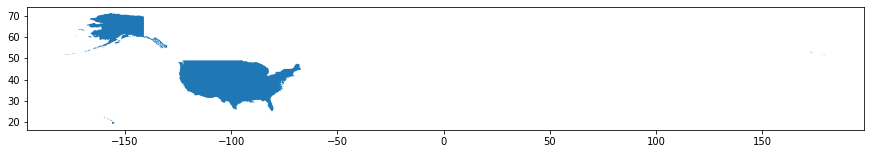

In [9]:
fig, ax = plt.subplots(figsize = (15, 15))
us_data.plot(ax = ax)
plt.show()

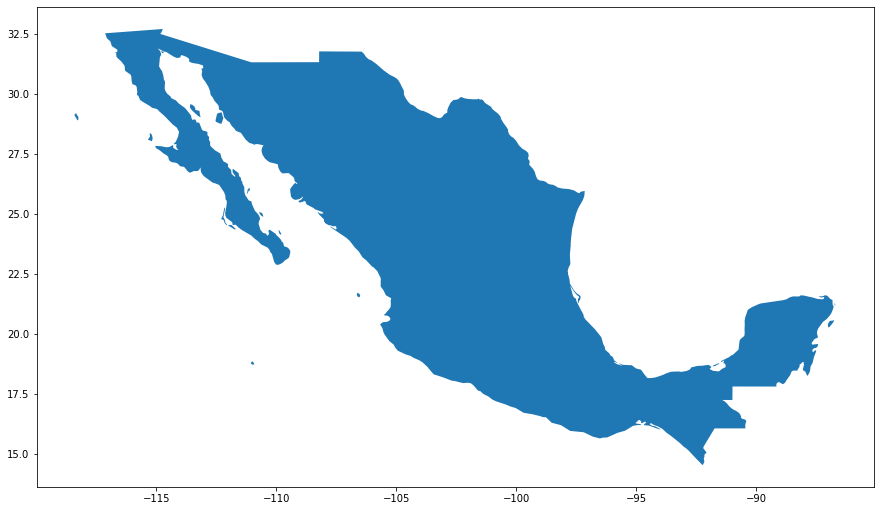

In [10]:
fig, ax = plt.subplots(figsize = (15, 15))
mex_data.plot(ax = ax)
plt.show()

In [11]:
# From https://www.schengenvisainfo.com/eu-countries/
europe = ['Austria',
'Belgium',
'Bulgaria',
'Croatia',
'Cyprus',
'Czech Republic',
'Denmark',
'Estonia',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Ireland',
'Italy',
'Latvia',
'Lithuania',
'Luxembourg',
'Malta',
'Netherlands',
'Poland',
'Portugal',
'Romania', 
'Slovakia',
'Slovenia',
'Spain',
'Sweden']

In [12]:
'Malta' in gdf.country.values

True

In [13]:
eu_set = set(europe)

In [14]:
gdf_set = set(gdf.country.values)

In [15]:
len(eu_set) - len(eu_set.intersection(gdf_set))

1

In [16]:
eu_set.difference(gdf_set)

{'Czech Republic'}

In [17]:
'Czechoslovakia' in gdf.country.values

False

In [18]:
len(gdf)

241

In [19]:
## Subsetting only european countries from the map
gdf_copy = gdf

In [20]:
indices_europe = []
for index in range(len(gdf)):
    if gdf.country.values[index] in europe:
        indices_europe.append(index)

In [21]:
europe_data = gdf.iloc[indices_europe]

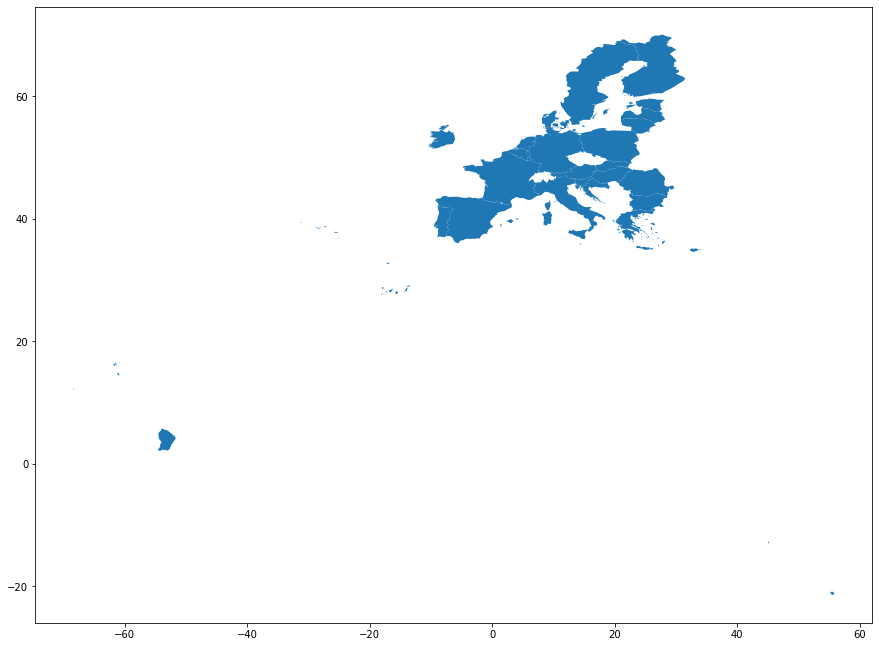

In [22]:
fig, ax = plt.subplots(figsize = (15, 15))
europe_data.plot(ax = ax)
plt.show()

In [23]:
europe_data

,country,country_code,geometry
48,Sweden,SWE,"MULTIPOLYGON (((19.07646 57.83594, 18.99375 57..."
54,Spain,ESP,"MULTIPOLYGON (((1.59395 38.67207, 1.57119 38.6..."
60,Slovakia,SVK,"POLYGON ((22.53867 49.07271, 22.52412 49.03140..."
61,Slovenia,SVN,"POLYGON ((16.51621 46.49990, 16.42764 46.52441..."
76,Romania,ROU,"POLYGON ((28.21250 45.45044, 28.31768 45.34712..."
78,Portugal,PRT,"MULTIPOLYGON (((-17.19087 32.86860, -17.05449 ..."
79,Poland,POL,"POLYGON ((23.60527 51.51792, 23.65889 51.44897..."
96,Netherlands,NLD,"MULTIPOLYGON (((5.99395 50.75044, 5.89246 50.7..."
112,Malta,MLT,"MULTIPOLYGON (((14.56621 35.85273, 14.53271 35..."
119,Luxembourg,LUX,"POLYGON ((6.11650 50.12100, 6.10830 50.09424, ..."


In [24]:
europe_shapefile = 'places.shp'

In [25]:
europe_gdf = gpd.read_file(europe_shapefile)

In [26]:
europe_gdf.head()

,osm_id,name,type,population,geometry
0,2,Wiesbaden-Naurod,village,0,POINT (8.30130 50.13594)
1,104849,Bristol,city,0,POINT (-2.59539 51.45582)
2,107775,London,city,7556900,POINT (-0.12782 51.50725)
3,132591,Woolverstone,hamlet,0,POINT (1.18200 52.00276)
4,132593,Chelmondiston,village,0,POINT (1.20875 51.98990)


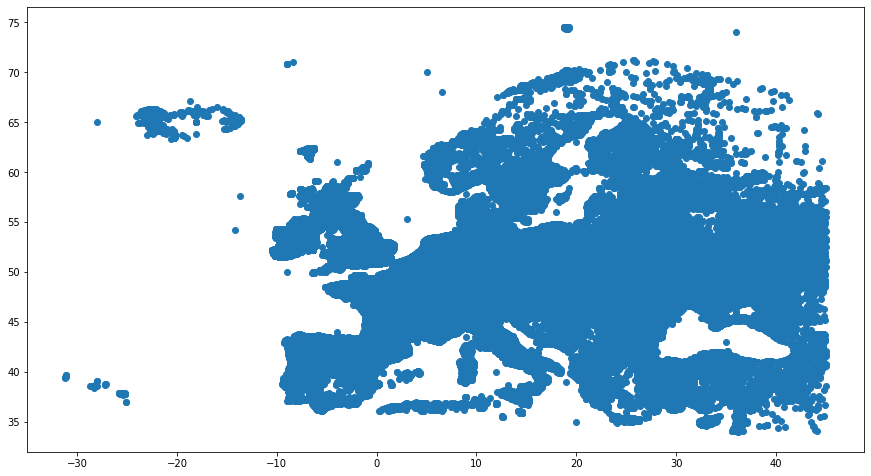

In [27]:
fig, ax = plt.subplots(figsize = (15, 15))
europe_gdf.plot(ax = ax)
plt.show()

In [28]:
natural_shapefile = 'natural.shp'

In [31]:
natural_eu_gdf = gpd.read_file(natural_shapefile)

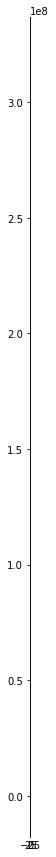

In [32]:
fig, ax = plt.subplots(figsize = (15, 15))
natural_eu_gdf.plot(ax = ax)
plt.show()

In [33]:
france_data = gdf.loc[gdf.country == 'France']

In [36]:
france_data.geometry

160    MULTIPOLYGON (((9.48037 42.80542, 9.45420 42.6...
Name: geometry, dtype: geometry

In [49]:
france = france_data.explode()['geometry'][1] ## Useful to quickly visualise

In [54]:
france_exploded = france_data.explode()

In [73]:
continental_france = pd.DataFrame(france_exploded.iloc[0]) # Should know how to switch series into data frame

In [107]:
boy = france_exploded.iloc[1].to_frame().transpose()

In [95]:
pd.DataFrame({'country': ['France']}, {'geometry': [france_exploded.iloc[1].geometry]})

,country
geometry,France


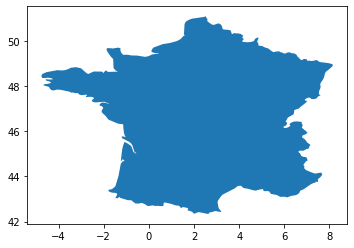

In [108]:
gpd.GeoDataFrame(boy).plot()
plt.show()

In [86]:
france_exploded.iloc[1]

country                                                    France
country_code                                                  FRA
geometry        POLYGON ((7.615625000000023 47.592724609375, 7...
Name: (160, 1), dtype: object

In [96]:
france_exploded.iloc[1]

array(['France', 'FRA',
      dtype=object)

In [69]:
continental_france.plot()
plt.show()

AttributeError: No geometry data set yet (expected in column 'geometry'.

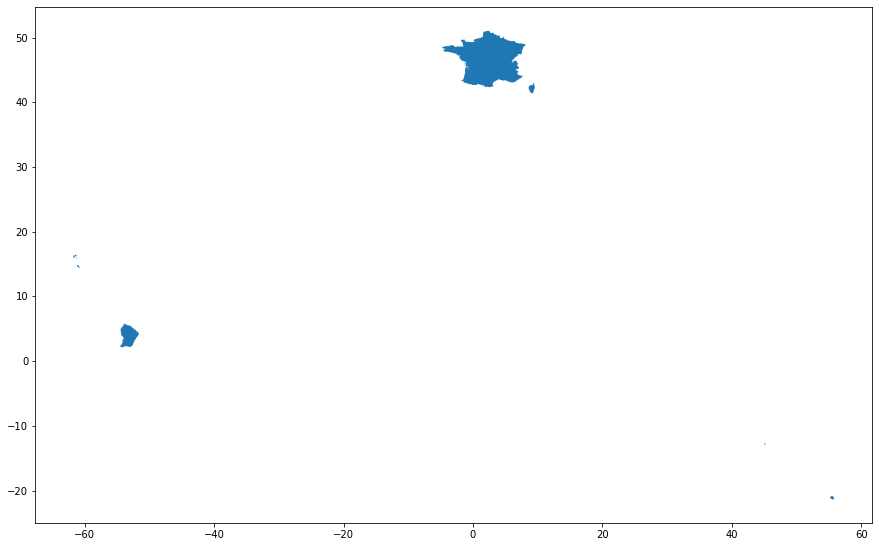

In [34]:
fig, ax = plt.subplots(figsize = (15, 15))
france_data.plot(ax = ax)
plt.show()

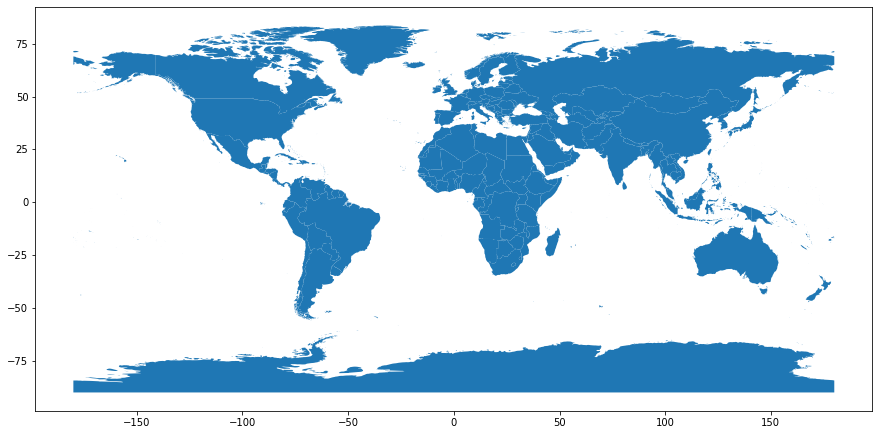

In [6]:
fig, ax = plt.subplots(figsize = (15, 15))
gdf.plot(ax = ax)
plt.show()

In [15]:
crs = {'init': 'epsg:4326'}

In [16]:
air = pd.read_csv('processed_chernair.csv')

In [20]:
geometry = [Point(xy) for xy in zip( air["longitude"], air["lattitude"]  )] 
# What does this code do?

In [21]:
geo_air = gpd.GeoDataFrame(air, crs = crs, geometry = geometry)

/Users/Leonard/miniconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [45]:
geo_air[['lattitude', 'longitude']]

,lattitude,longitude
0,12.07,55.7
1,12.07,55.7
2,12.07,55.7
3,12.07,55.7
4,12.07,55.7
...,...,...
2046,19.10,47.5
2047,19.10,47.5
2048,19.10,47.5
2049,19.10,47.5


In [46]:
geo_air.head(10)

,Unnamed: 0,country,Code,city,lattitude,longitude,Date,endsampling,duration,i131,cs134,cs137,geometry
0,0,SE,1,RISOE,12.07,55.7,1986-04-27,0,24.0,1.000000,0.000000,0.240000,POINT (55.70000 12.07000)
1,1,SE,1,RISOE,12.07,55.7,1986-04-28,0,24.0,0.004600,0.000540,0.000980,POINT (55.70000 12.07000)
2,2,SE,1,RISOE,12.07,55.7,1986-04-29,12,12.0,0.014700,0.004300,0.007400,POINT (55.70000 12.07000)
3,3,SE,1,RISOE,12.07,55.7,1986-04-29,0,12.0,0.000610,0.000000,0.000090,POINT (55.70000 12.07000)
4,4,SE,1,RISOE,12.07,55.7,1986-04-30,0,24.0,0.000750,0.000100,0.000280,POINT (55.70000 12.07000)
5,5,SE,1,RISOE,12.07,55.7,1986-05-01,0,24.0,0.000530,0.000000,0.000200,POINT (55.70000 12.07000)
6,6,SE,1,RISOE,12.07,55.7,1986-05-02,0,24.0,0.017600,0.000000,0.000220,POINT (55.70000 12.07000)
7,7,SE,1,RISOE,12.07,55.7,1986-05-03,0,24.0,0.223900,0.002120,0.003560,POINT (55.70000 12.07000)
8,8,SE,1,RISOE,12.07,55.7,1986-05-04,12,12.0,0.410000,0.014200,0.022700,POINT (55.70000 12.07000)
9,9,SE,1,RISOE,12.07,55.7,1986-05-04,0,12.0,0.264303,0.014342,0.023966,POINT (55.70000 12.07000)


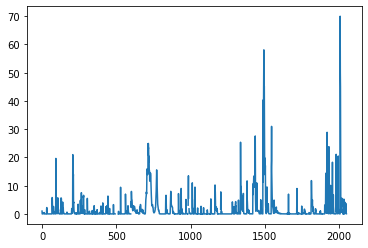

In [35]:
#fig, ax = plt.subplots(figsize = (20, 20))
#gdf.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_air.i131.plot()
plt.show()

In [15]:
'HU' in gdf.country_code.values

True

In [31]:
gdf.head()

,country,country_code,geometry
0,Zimbabwe,ZWE,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Zambia,ZMB,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Yemen,YEM,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Vietnam,VNM,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Venezuela,VEN,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [16]:
gdf.country.plot()

TypeError: no numeric data to plot

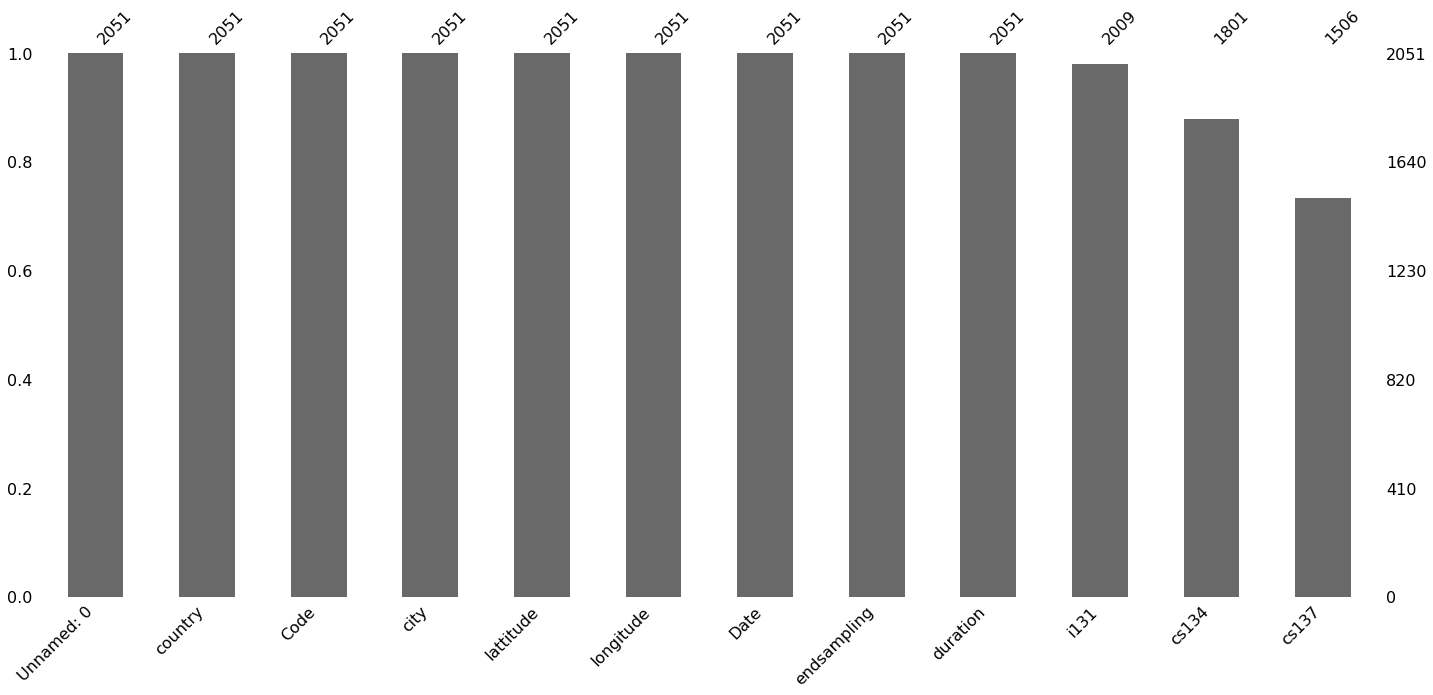

In [20]:
%matplotlib inline
msn.bar(air)